# Transform variables like time of day or year into a format that can be used by machine learning models.

Mainly sin/cos, think about period to enclose entire timeframe in 2pi.

In [12]:
import pandas as pd
from datetime import datetime

test_df = pd.DataFrame({
    'date': [datetime(2020, 1, 1), datetime(2020, 3, 1), datetime(2020, 1, 2), datetime(2020, 1, 8), datetime(2020, 6, 10), datetime(2020, 11, 20)],
    'region': ["Sau Paulo", "Sau Paulo", "Rio de Janeiro", "Rio de Janeiro", "Rio de Janeiro", "Rio de Janeiro"],
})

In [13]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent / 'src'))
from forecastpnn.utils.data_functions import get_dataset

df = get_dataset(test_df, "date", False, False, 30, True, dow=False)

reloaded


In [14]:
import numpy as np

df
# Add a column for the day of the year
df['day_of_year'] = df.index.dayofyear

# Transform the day of the year using sine and cosine
df['sin_day_of_year'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['cos_day_of_year'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

df.head(100)

,count,day_of_year,sin_day_of_year,cos_day_of_year
2020-01-01,1,1,0.017213,0.999852
2020-01-02,1,2,0.034422,0.999407
2020-01-03,0,3,0.051620,0.998667
2020-01-04,0,4,0.068802,0.997630
2020-01-05,0,5,0.085965,0.996298
...,...,...,...,...
2020-04-05,0,96,0.996659,-0.081676
2020-04-06,0,97,0.995105,-0.098820
2020-04-07,0,98,0.993257,-0.115935
2020-04-08,0,99,0.991114,-0.133015


In [15]:
df.tail(100)

,count,day_of_year,sin_day_of_year,cos_day_of_year
2020-08-13,0,226,-0.680773,-0.732494
2020-08-14,0,227,-0.693281,-0.720667
2020-08-15,0,228,-0.705584,-0.708627
2020-08-16,0,229,-0.717677,-0.696376
2020-08-17,0,230,-0.729558,-0.683919
...,...,...,...,...
2020-11-16,0,321,-0.687053,0.726608
2020-11-17,0,322,-0.674444,0.738326
2020-11-18,0,323,-0.661635,0.749826
2020-11-19,0,324,-0.648630,0.761104


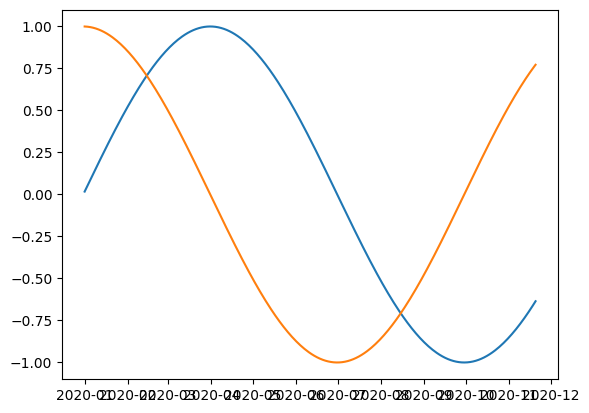

In [16]:
import matplotlib.pyplot as plt
plt.plot(df['sin_day_of_year'])
plt.plot(df['cos_day_of_year'])
plt.show()

In [17]:
# Add a column for the day of the week
df['day_of_week'] = df.index.dayofweek

# Transform the day of the week using sine and cosine
df['sin_day_of_week'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['cos_day_of_week'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

df.head(100)

,count,day_of_year,sin_day_of_year,cos_day_of_year,day_of_week,sin_day_of_week,cos_day_of_week
2020-01-01,1,1,0.017213,0.999852,2,0.974928,-0.222521
2020-01-02,1,2,0.034422,0.999407,3,0.433884,-0.900969
2020-01-03,0,3,0.051620,0.998667,4,-0.433884,-0.900969
2020-01-04,0,4,0.068802,0.997630,5,-0.974928,-0.222521
2020-01-05,0,5,0.085965,0.996298,6,-0.781831,0.623490
...,...,...,...,...,...,...,...
2020-04-05,0,96,0.996659,-0.081676,6,-0.781831,0.623490
2020-04-06,0,97,0.995105,-0.098820,0,0.000000,1.000000
2020-04-07,0,98,0.993257,-0.115935,1,0.781831,0.623490
2020-04-08,0,99,0.991114,-0.133015,2,0.974928,-0.222521


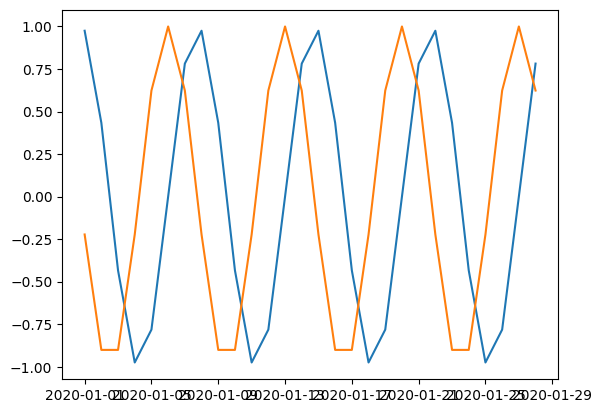

In [19]:
plt.plot(df['sin_day_of_week'][:28])
plt.plot(df['cos_day_of_week'][:28])
plt.show()